In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.jet()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<Figure size 640x480 with 0 Axes>

## Some parameters

In [2]:
r_S1_center_in_S0 = 8.710 #distance of S1 to optical axis in m
diameter_of_CA = 8.365 #CA diamter in m
radius_of_curvature = 36.000 #radius of curvature in m
conic = -0.998286
radius_of_CA = diameter_of_CA/2.0
y_S1_center = r_S1_center_in_S0
x_S1_center = 0

## Load Christoph's mat file

In [3]:
import scipy.io
mat2 = scipy.io.loadmat('Bo2.mat')

In [4]:
mat2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'elongations', 'inputHP', 'normalDisp', 'x', 'y', 'z'])

In [5]:
x=np.array(mat2['x'])
y=np.array(mat2['y'])
d=np.array(mat2['normalDisp'])

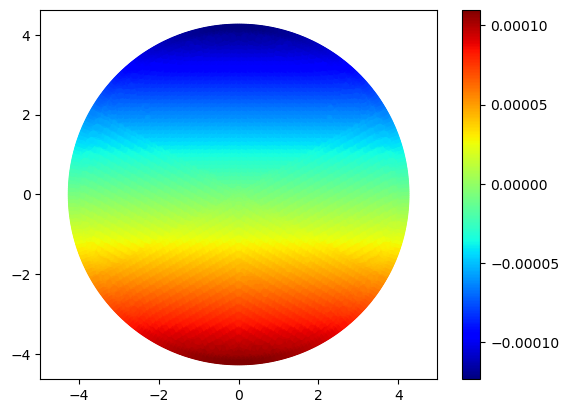

In [6]:
plt.scatter(x,y,10,c=d)
plt.axis('equal')
plt.colorbar();

## Get everything to M1S0 Coordinate System (so we can use the equation for ideal surface)

<img src="CSYS.jpeg" alt="isolated" width="500"/>

In [7]:
x_in_parent = x
y_in_parent = y+r_S1_center_in_S0
r2_in_parent = x_in_parent**2+y_in_parent**2
z = r2_in_parent/(radius_of_curvature+np.sqrt(radius_of_curvature**2-(1+conic)*r2_in_parent))

#for S1 center
x0 = x_S1_center
y0 = y_S1_center
r2_0 = x0**2+y0**2
z0 = r2_0/(radius_of_curvature+np.sqrt(radius_of_curvature**2-(1+conic)*r2_0))

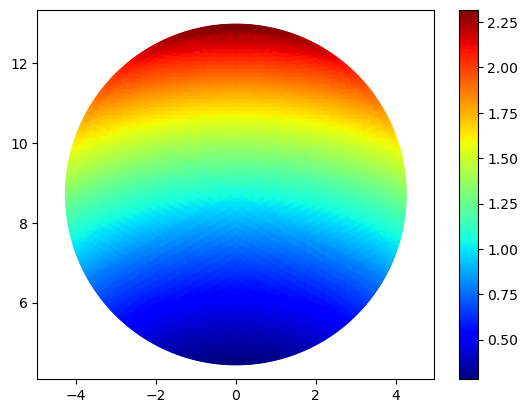

In [8]:
plt.scatter(x_in_parent,y_in_parent, 10, c=z)
plt.axis('equal')
plt.colorbar();

## get surface normal vectors by drawing a arrow from a node to the center of curvature (OSS coordinate=(0,0,radius_of_curvature))

In [9]:
ux = 0-x_in_parent
uy = 0-y_in_parent
uz = radius_of_curvature-z
ur = np.sqrt(ux**2+uy**2+uz**2)
ux /= ur
uy /= ur
uz /= ur

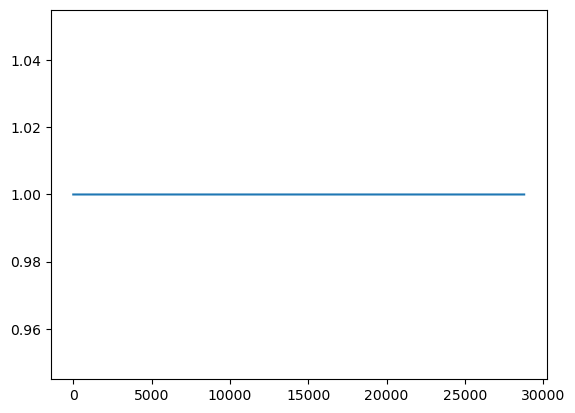

In [10]:
#verify that these are unit vectors
plt.plot(np.sqrt(ux**2+uy**2+uz**2))

## Calculate the displacement vectors

#### radial shift of 1mm 

### same displacement vector for every node (so we only calculate this for S1 center!!!)

In [11]:
tt = 1e-3 #shift of 1mm
cost = (radius_of_curvature - z0)/radius_of_curvature #cos(theta)
sint = y0/radius_of_curvature  #sin(theta)
tx = 0
ty = tt*cost
tz = tt*sint
print(cost**2+sint**2, cost, sint) #yes, !!!same displacement vector for every node

1.0008552230431464 0.9707307087166943 0.24194444444444446


In [12]:
tn = tx*ux+ty*uy+tz*uz #inner product

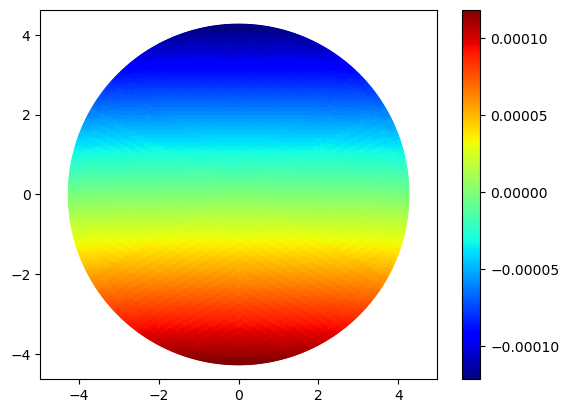

In [13]:
plt.scatter(x,y, 10, c=tn)
plt.axis('equal')
plt.colorbar();

## Compare to Christoph's surface normal displacements

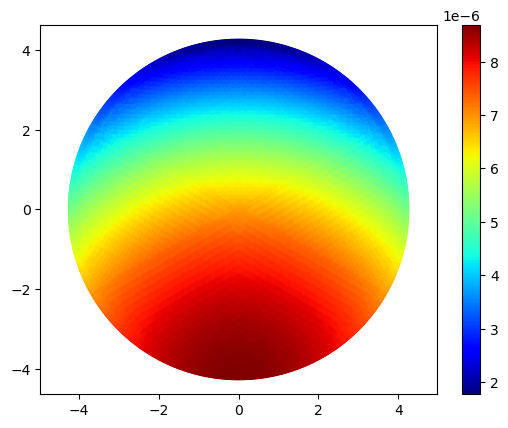

In [14]:
plt.scatter(x,y, 10, c=tn-d)
plt.axis('equal')
plt.colorbar();